In [55]:
import os
#display pictures
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import tensorflow as tf 

In [56]:
#Vertical barchart images
vertical_bar_chart_dir = os.path.join("Images/Vertical_Bar_Chart")

#Horizontal barchart images
horizontal_bar_chart_dir = os.path.join("Images/Horizontal_Bar_Chart")

#Line chart images
line_chart_dir = os.path.join("Images/Line_chart")


In [57]:
#print file names
vertical_bar_chart_names = os.listdir(vertical_bar_chart_dir)
print(vertical_bar_chart_names[:10])

horizontal_bar_chart_names = os.listdir(horizontal_bar_chart_dir)
print(vertical_bar_chart_names[:10])

line_chart_names = os.listdir(line_chart_dir)
print(line_chart_names[:10])

['0.png', '1.png', '10.png', '100.png', '102.png', '104.png', '106.png', '107.png', '108.png', '109.png']
['0.png', '1.png', '10.png', '100.png', '102.png', '104.png', '106.png', '107.png', '108.png', '109.png']
['1000.png', '1002.png', '1005.png', '1006.png', '1009.png', '101.png', '1016.png', '1017.png', '1018.png', '1019.png']


In [58]:
#total number of images
print("Total number of verical bar chart images: ", len(vertical_bar_chart_names))
print("Total number of horizontal bar chart images: ", len(horizontal_bar_chart_names))
print("Total number of line chart images: ", len(line_chart_names))

Total number of verical bar chart images:  500
Total number of horizontal bar chart images:  500
Total number of line chart images:  500


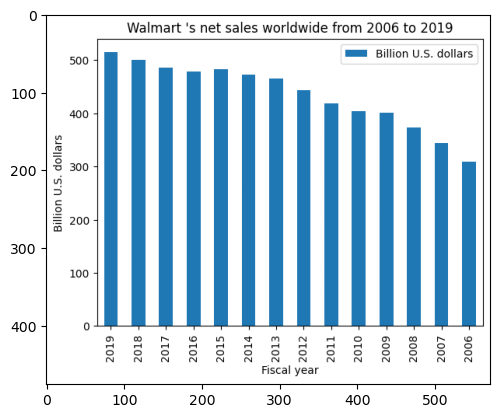

In [59]:
#vertical bar chart display
img = mpimg.imread(os.path.join(vertical_bar_chart_dir, vertical_bar_chart_names[5]))
plt.imshow(img)

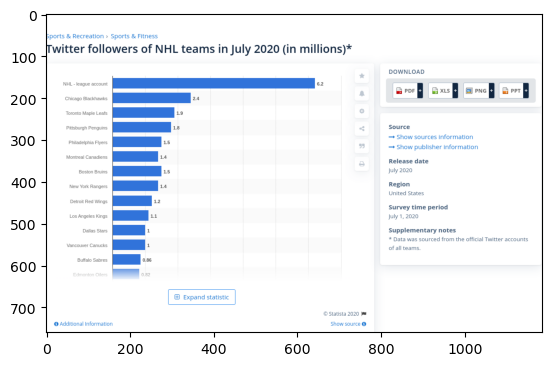

In [60]:
#Horizontal bar chart display
img = mpimg.imread(os.path.join(horizontal_bar_chart_dir, horizontal_bar_chart_names[5]))
plt.imshow(img)

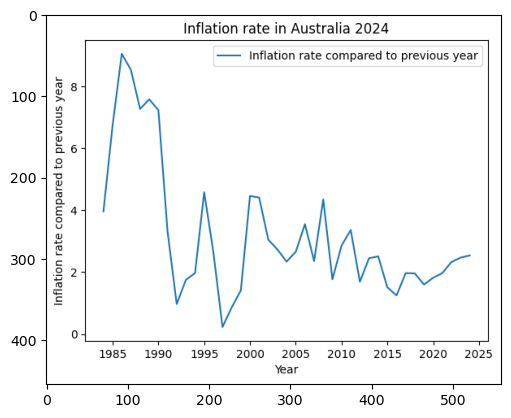

In [61]:
#line chart
img = mpimg.imread(os.path.join(line_chart_dir, line_chart_names[5]))
plt.imshow(img)

In [62]:
#model

model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16, (3,3), activation = 'relu', input_shape=(300,300,3)),
    tf.keras.layers.MaxPool2D(2,2),
    #second conv
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPool2D(2,2),
    #third conv
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPool2D(2,2),
    #fourth conv
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPool2D(2,2),
    #fifth conv
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPool2D(2,2),
    #flatten
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [63]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 298, 298, 16)      448       
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 149, 149, 16)     0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 147, 147, 32)      4640      
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 73, 73, 32)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 71, 71, 64)        18496     
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 35, 35, 64)      

In [64]:
#compile
from tensorflow.keras.optimizers import RMSprop

model.compile(loss='binary_crossentropy',
              optimizer=RMSprop(learning_rate=0.001),
              metrics = ['accuracy'])

In [92]:
#image generator

from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1/255)

train_generator = train_datagen.flow_from_directory(
    'Images',
    target_size = (300,300),
    batch_size = 128,
    class_mode = 'binary'
)

Found 1517 images belonging to 4 classes.


In [93]:
#history-model fitting
history = model.fit(
    train_generator,
    steps_per_epoch = 8,
    epochs = 10,
    verbose =1
)

Epoch 1/10
11/11 [==============================] - 32s 3s/step - loss: -1027967424.0000 - accuracy: 0.3297
Epoch 2/10
 4/11 [=========>....................] - ETA: 20s - loss: -1843892608.0000 - accuracy: 0.3398

KeyboardInterrupt: 

In [91]:
import numpy as np
import keras.utils as image
from ipywidgets import FileUpload
from IPython.display import display

 
  # predicting images
path = 'Images/test/1167.png'
img = image.load_img(path, target_size=(300, 300))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)

images = np.vstack([x])
classes = model.predict(images, batch_size=10)
print(classes)
if classes[0]:
    print(" is a Vertical Bar Chart")
elif classes:
    print(" is a Horizontal Bar Chart")
elif classes[2]:
    print(" Is a line chart")
else:
    print("Some other image")

1/1 [==============================] - 0s 25ms/step
[[1.]]
 is a Vertical Bar Chart
